# 1D Cellular Automata, w/ 3 neighbour rule
## (white - 0, black - 1)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def decToBin(dec, bitn = -1):
    out = []
    while(dec >= 1):
        out.append(dec%2)
        dec = dec//2
     
    if(bitn != -1):
        while(len(out) < bitn):
            out.append(0)
            
    out = out[::-1]
    return out

def CellularAutomata(n, rule, n_iter, init = [0]):
    
    grid = np.zeros((n_iter, n), dtype = int)
    
    #initial conditions
    if(len(init) == 1):
        grid[0, :] = np.zeros(n, dtype = int)
        grid[0, n//2] = 1
    else:
        grid[0, :] = init[:]
        
    #construct local rules based on rule number
    rulelist = decToBin(rule, 8)
    localrule = {tuple(decToBin(i, 3)): rulelist[7 - i] for i in range(8)}

    #evolution of the automata
    for i in range(1, n_iter):
        for j in range(0, n):
            grid[i, j] = localrule[(grid[i-1, (j-1)%n], grid[i-1, j], grid[i-1, (j+1)%n])]
        
    fig, ax = plt.subplots()
    plt.imshow(1 - grid, cmap = 'gray') #invert colors
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

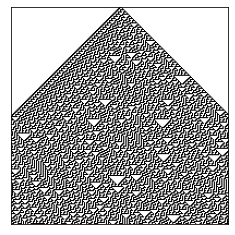

In [38]:
CellularAutomata(200, 30, 200)